# Customer Segmentation With Unsupervised Learning


## Business Understanding

# Data Understanding

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from skmultilearn.adapt import MLkNN
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading the dataset
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
import pandas as pd

# define a function to remove special characters, white space, and numbers from column names
def remove_special_chars(col):
    # replace white space with underscore
    col = col.replace(' ', '_')
    # remove special characters and numbers
    return ''.join(e for e in col if e.isalnum())

# rename columns with special characters, white space, and numbers removed
df = df.rename(columns=remove_special_chars)

print(df)


     CustomerID  Gender  Age  AnnualIncomek  SpendingScore1100
0             1    Male   19             15                 39
1             2    Male   21             15                 81
2             3  Female   20             16                  6
3             4  Female   23             16                 77
4             5  Female   31             17                 40
..          ...     ...  ...            ...                ...
195         196  Female   35            120                 79
196         197  Female   45            126                 28
197         198    Male   32            126                 74
198         199    Male   32            137                 18
199         200    Male   30            137                 83

[200 rows x 5 columns]


In [5]:

def remove_numbers(col):
    return ''.join([i for i in col if not i.isdigit()])

# rename columns with numbers removed
df = df.rename(columns=remove_numbers)

print(df)


     CustomerID  Gender  Age  AnnualIncomek  SpendingScore
0             1    Male   19             15             39
1             2    Male   21             15             81
2             3  Female   20             16              6
3             4  Female   23             16             77
4             5  Female   31             17             40
..          ...     ...  ...            ...            ...
195         196  Female   35            120             79
196         197  Female   45            126             28
197         198    Male   32            126             74
198         199    Male   32            137             18
199         200    Male   30            137             83

[200 rows x 5 columns]


In [6]:
df = df.rename(columns=lambda x: x.replace('AnnualIncomek', 'Annualincome'))



In [7]:
#df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [8]:
df.head(1)


,CustomerID,Gender,Age,Annualincome,SpendingScore
0,1,Male,19,15,39


In [9]:
#check for missing values
df.isna().sum()

CustomerID       0
Gender           0
Age              0
Annualincome     0
SpendingScore    0
dtype: int64

In [10]:
#check for duplicates
df.duplicated().sum()

0

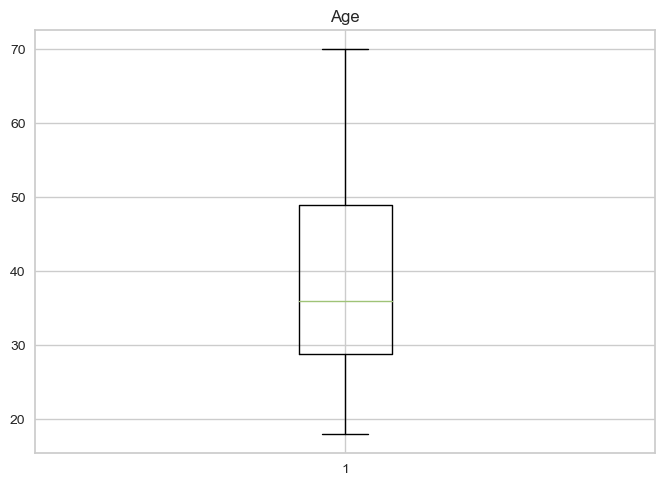

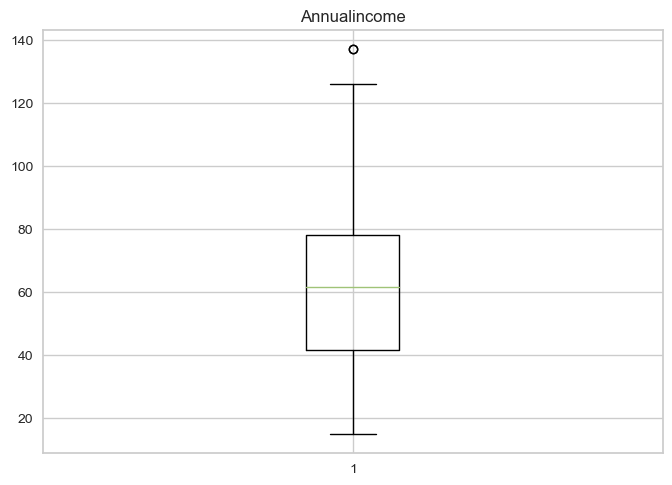

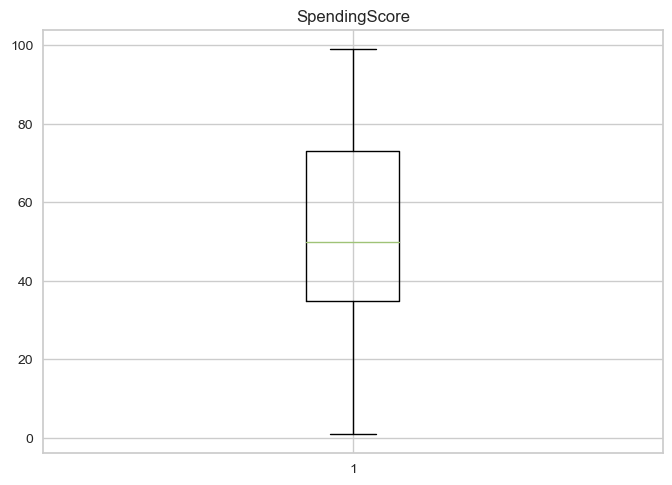

In [11]:
for col in ['Age', 'Annualincome', 'SpendingScore']:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

#### Feature engineering


In [12]:
df1=df.copy()
df1.head()

,CustomerID,Gender,Age,Annualincome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Creating a new generation column
def age_range(Age):
    if Age <= 26:
        return 'GenZ'
    elif  Age > 26 and Age <=42:
        return 'Millenials'
    elif Age > 42 and Age <= 58:
        return  'GenX'
    elif Age > 58 and Age <= 68:
        return 'Boomers2'
    elif Age > 68 and Age <= 77:
        return 'Boomers1'
    else:
        return 'PostWar'
    
df1['generation']=df1['Age'].map(age_range)
df1

,CustomerID,Gender,Age,Annualincome,SpendingScore,generation
0,1,Male,19,15,39,GenZ
1,2,Male,21,15,81,GenZ
2,3,Female,20,16,6,GenZ
3,4,Female,23,16,77,GenZ
4,5,Female,31,17,40,Millenials
...,...,...,...,...,...,...
195,196,Female,35,120,79,Millenials
196,197,Female,45,126,28,GenX
197,198,Male,32,126,74,Millenials
198,199,Male,32,137,18,Millenials


In [14]:
# creating a new income class function
def income_range(Annualincome):
    if Annualincome <= 53:
        return 'LowerIncome'
    elif  Annualincome > 53 and Annualincome <=156:
        return 'MiddleIncome'
    else:
        return 'UpperIncome'
    
    
df1['Income']=df1['Annualincome'].map(income_range)
df1.head()


,CustomerID,Gender,Age,Annualincome,SpendingScore,generation,Income
0,1,Male,19,15,39,GenZ,LowerIncome
1,2,Male,21,15,81,GenZ,LowerIncome
2,3,Female,20,16,6,GenZ,LowerIncome
3,4,Female,23,16,77,GenZ,LowerIncome
4,5,Female,31,17,40,Millenials,LowerIncome


### Exploratory Data Analysis

#### Univariate Analysis

In [15]:
"""A function to draw distribution plots"""
def get_dist(column1,column2,column3):
    fig, axes = plt.subplots(1, 4, figsize=(12,4))

# Loop over columns and create distribution plots in each subplot
    for i, col in enumerate([column1, column2, column3]):
        sns.distplot(df1[col], ax=axes[i], bins=20)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(col)
        axes[i].set_title(col)
    # Adjust spacing between subplots
    plt.tight_layout()
    # Show the plot
    plt.show()
    
    
"""A function to draw bar graphs"""
def get_bar(column1, column2, column3):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Loop over columns and create distribution plots in each subplot
    for i, col in enumerate([column1, column2, column3]):
        count = df1[col].value_counts()
        x = count.index
        y = count.values
        axes[i].bar(x, y)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_title('Distribution of{}'.format(col))
        axes[i].set_xticklabels(x, rotation=45)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()
    
"""A function to draw bivariate graphs"""
def get_biv(col1,col2,data):
    plt.figure(figsize=(16,8))
    sns.countplot(x =col1, hue = col2, data = data)
    plt.title(f'Relationship between {col1} and {col2}')
    # Show the plot
    plt.show()
    
    
    
"""A Function that plots scatter plots"""
def get_scatter(col1,col2,col3):
    plt.figure(1 , figsize = (17 , 8))
    n = 0 
    for x in [col1,col2,col3]:
        for y in [col1,col2,col3]:
            if x != y:  # Avoid plotting the same column against itself
                n += 1
                plt.subplot(3 , 3 , n)
                # Create scatter plot
                plt.scatter(df1[x], df1[y])

                # Set axis labels and title
                plt.xlabel(x)
                plt.ylabel(y)
                # plt.title('Scatter plot of {} vs {}'.format(x, y))
                plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )

                # Show plot
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

"""A function that perfoms MultiVariate  Scatter with respect to Gender"""
def get_multi(col1,col2):
    plt.figure(1,figsize=(15,6))
    for gender in['Male','Female']:
        plt.scatter(x=col1,y=col2,data=df1[df1['Gender']== gender],label=gender)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2} w.r to Gender')
    
"""A function that perfoms MultiVariate  Scatter with respect to Annual Income"""
def get_multi_income(col1,col2):
    plt.figure(1,figsize=(15,6))
    for income in['MiddleIncome','LowerIncome']:
        plt.scatter(x=col1,y=col2,data=df1[df1['Income']== income],label=income)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2} w.r to Income')

In [16]:
df1.head()

,CustomerID,Gender,Age,Annualincome,SpendingScore,generation,Income
0,1,Male,19,15,39,GenZ,LowerIncome
1,2,Male,21,15,81,GenZ,LowerIncome
2,3,Female,20,16,6,GenZ,LowerIncome
3,4,Female,23,16,77,GenZ,LowerIncome
4,5,Female,31,17,40,Millenials,LowerIncome


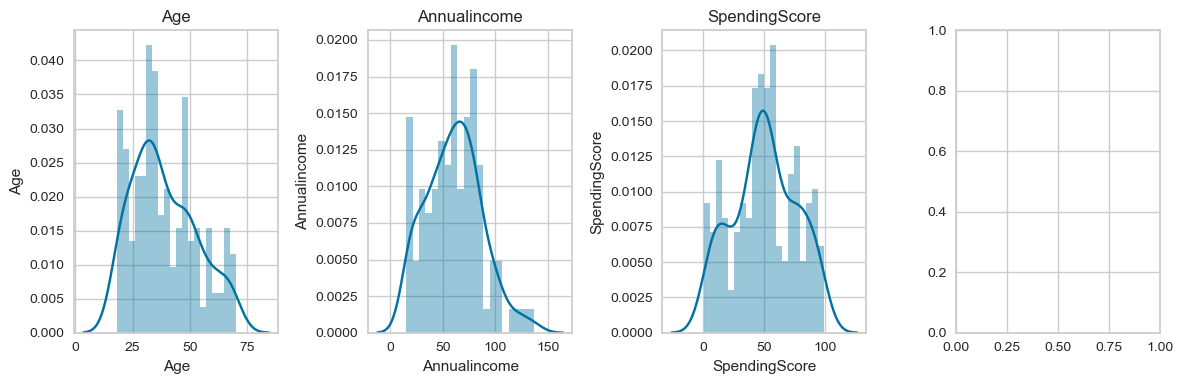

In [17]:
get_dist('Age','Annualincome','SpendingScore')

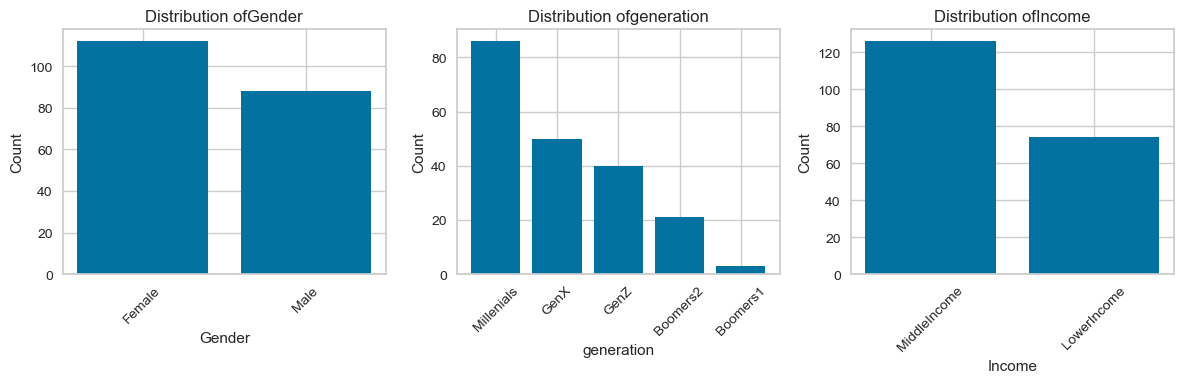

In [18]:
get_bar('Gender','generation','Income')

### Bivariate Analysis

In [19]:
def get_biv(col1,col2,data):
    plt.figure(figsize=(16,8))
    sns.countplot(x =col1, hue = col2, data = data)
    plt.title(f'Relationship between {col1} and {col2}')
    # Show the plot
    plt.show()

In [20]:
df1.head()

,CustomerID,Gender,Age,Annualincome,SpendingScore,generation,Income
0,1,Male,19,15,39,GenZ,LowerIncome
1,2,Male,21,15,81,GenZ,LowerIncome
2,3,Female,20,16,6,GenZ,LowerIncome
3,4,Female,23,16,77,GenZ,LowerIncome
4,5,Female,31,17,40,Millenials,LowerIncome


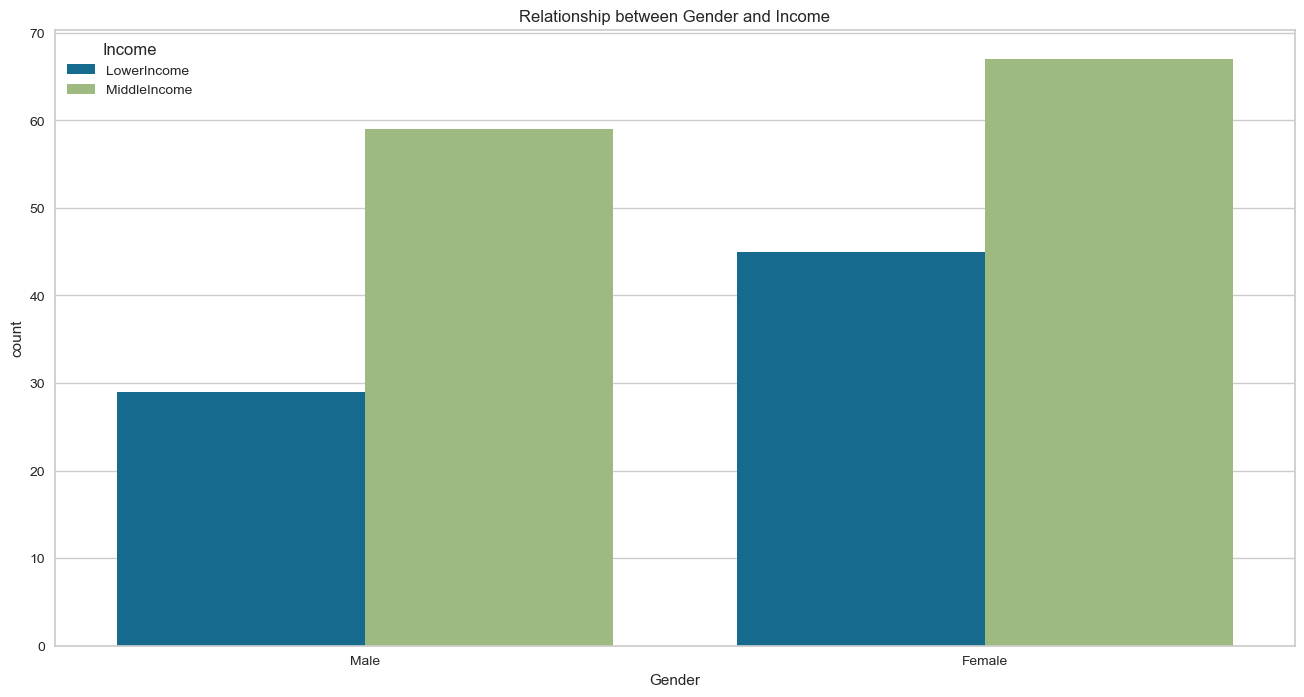

In [21]:
get_biv('Gender','Income',df1)

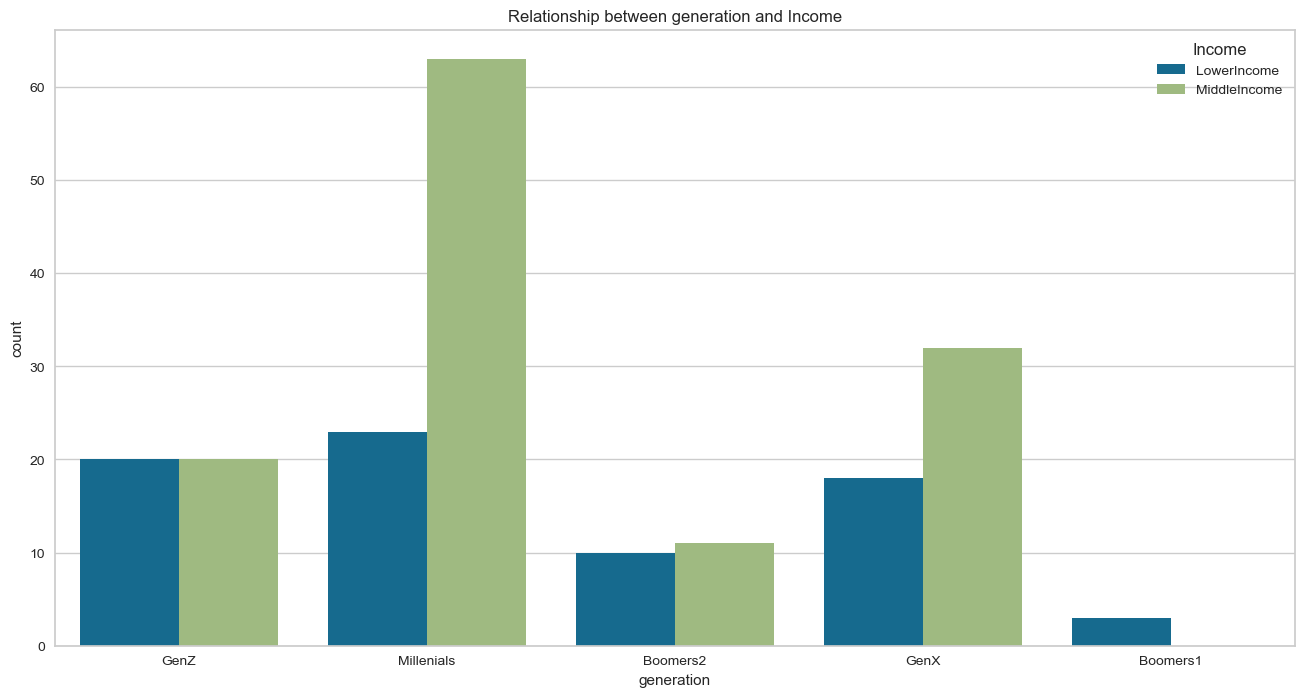

In [22]:
get_biv('generation','Income',df1)

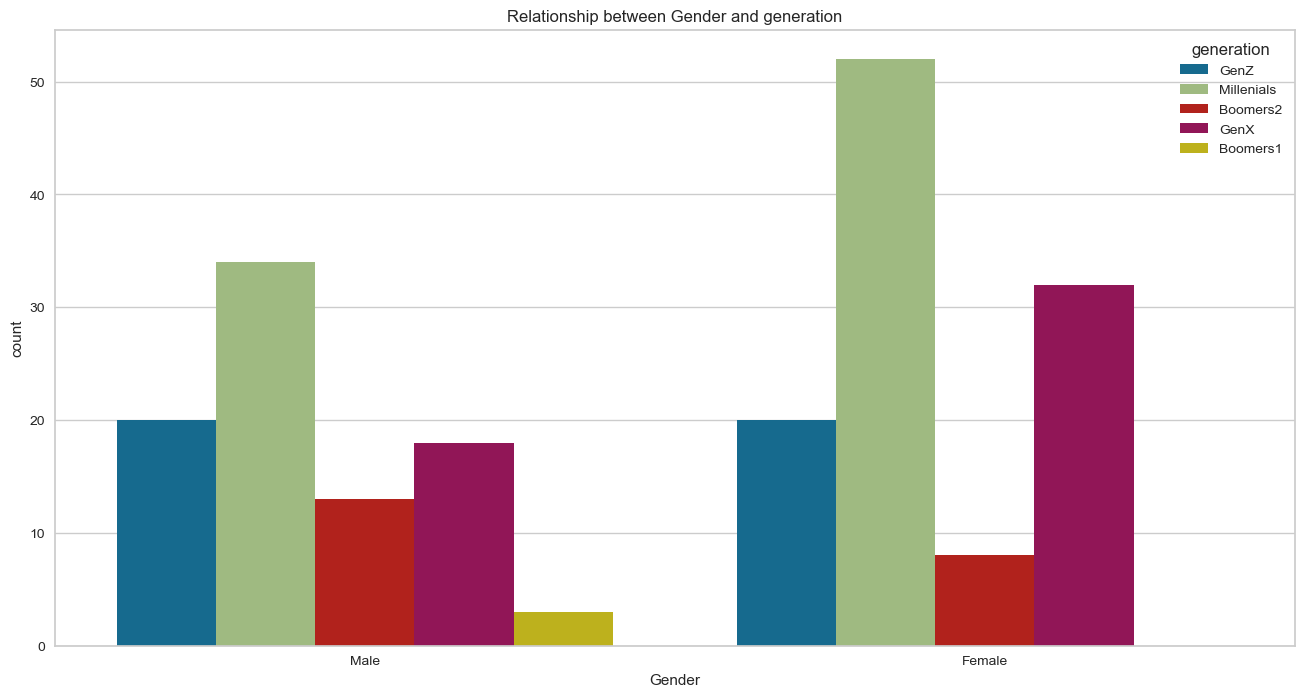

In [23]:
get_biv('Gender','generation',df1)

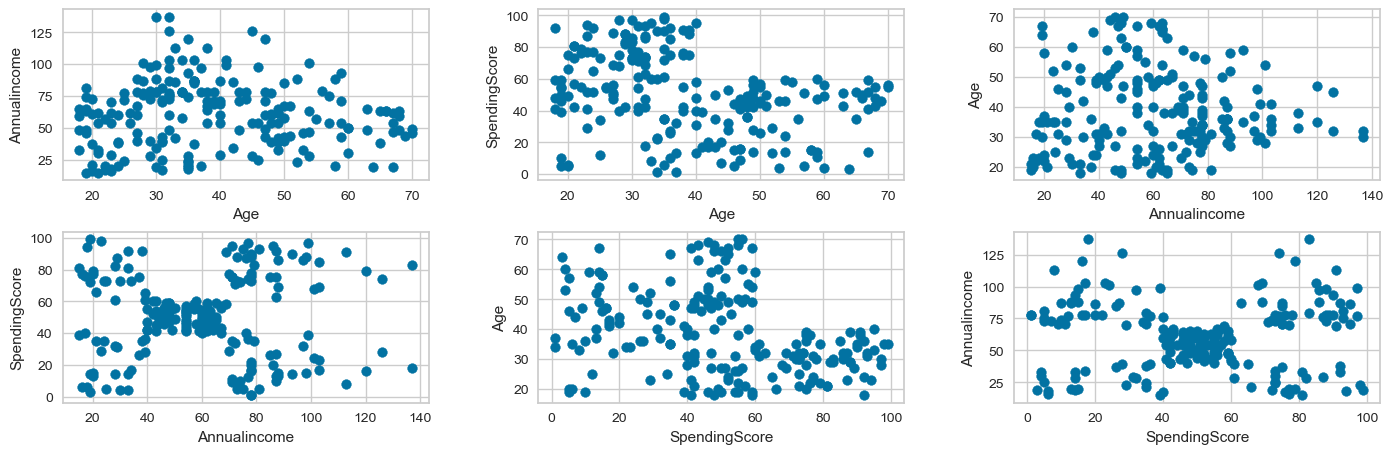

In [24]:
get_scatter('Age','Annualincome','SpendingScore')

#### Correlation  matrix

In [25]:
corr_matrix = df.corr()
corr_matrix

,CustomerID,Age,Annualincome,SpendingScore
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annualincome,0.977548,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.327227,0.009903,1.000000


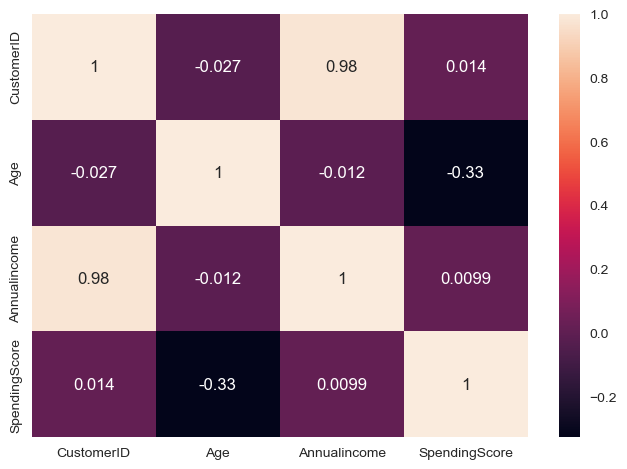

In [26]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

Multivariate Analysis

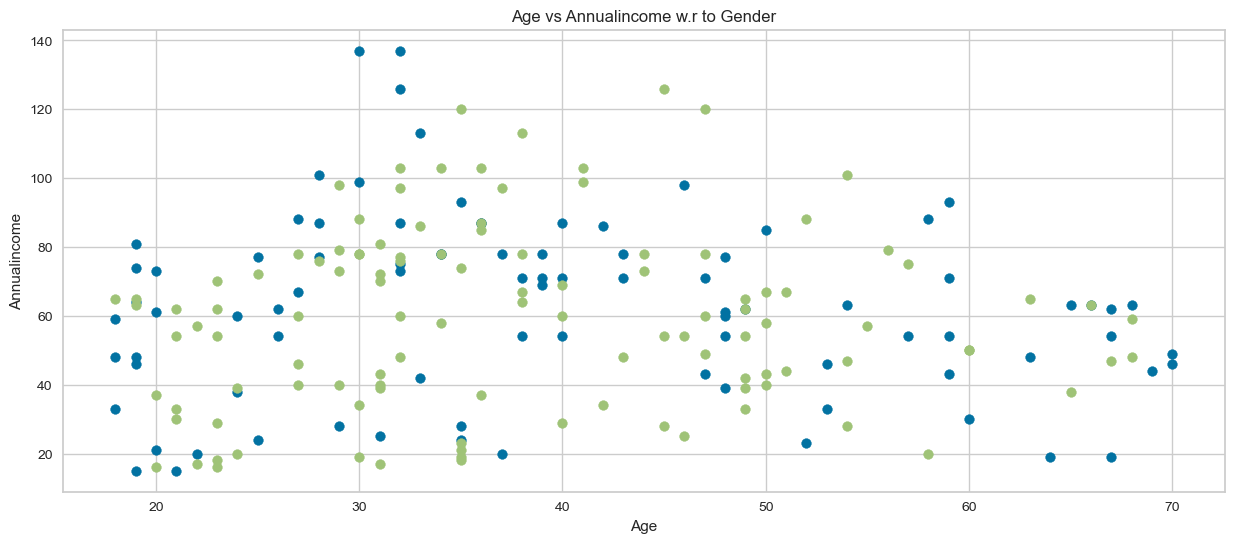

In [27]:
# Scatter plots with respect to Gender
get_multi('Age','Annualincome')

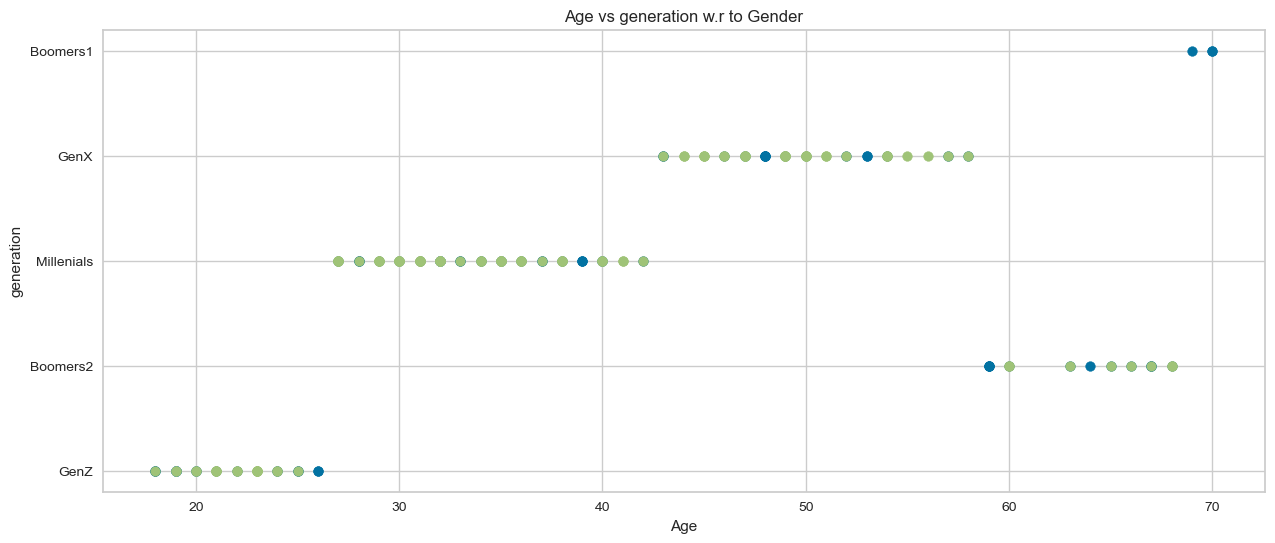

In [28]:
get_multi('Age','generation')

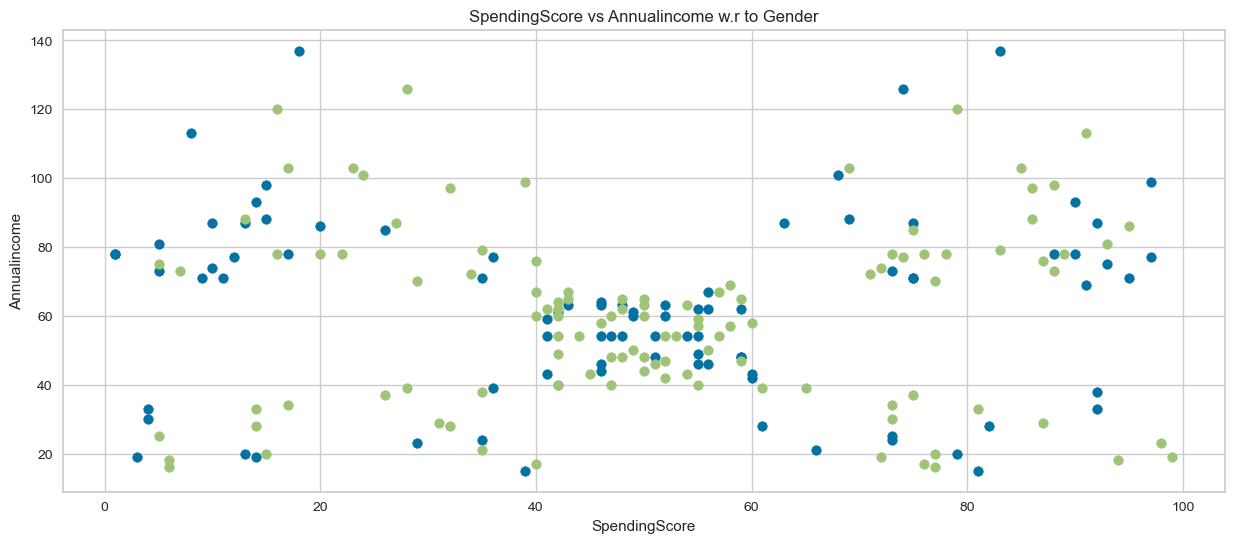

In [29]:
get_multi('SpendingScore','Annualincome')

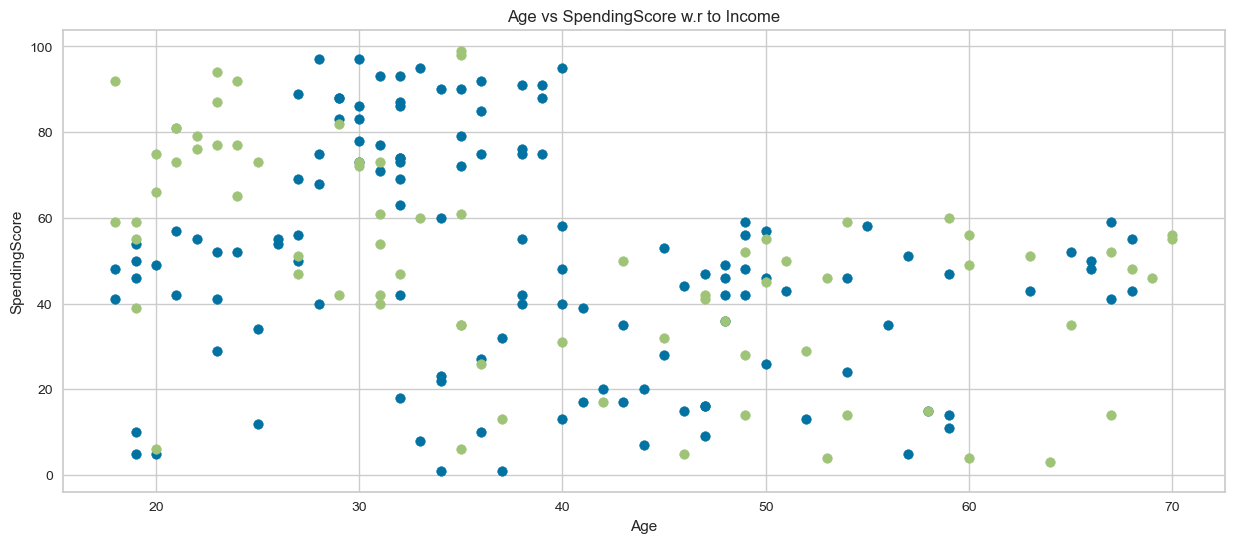

In [30]:
# With respect to Annual income
get_multi_income('Age','SpendingScore')

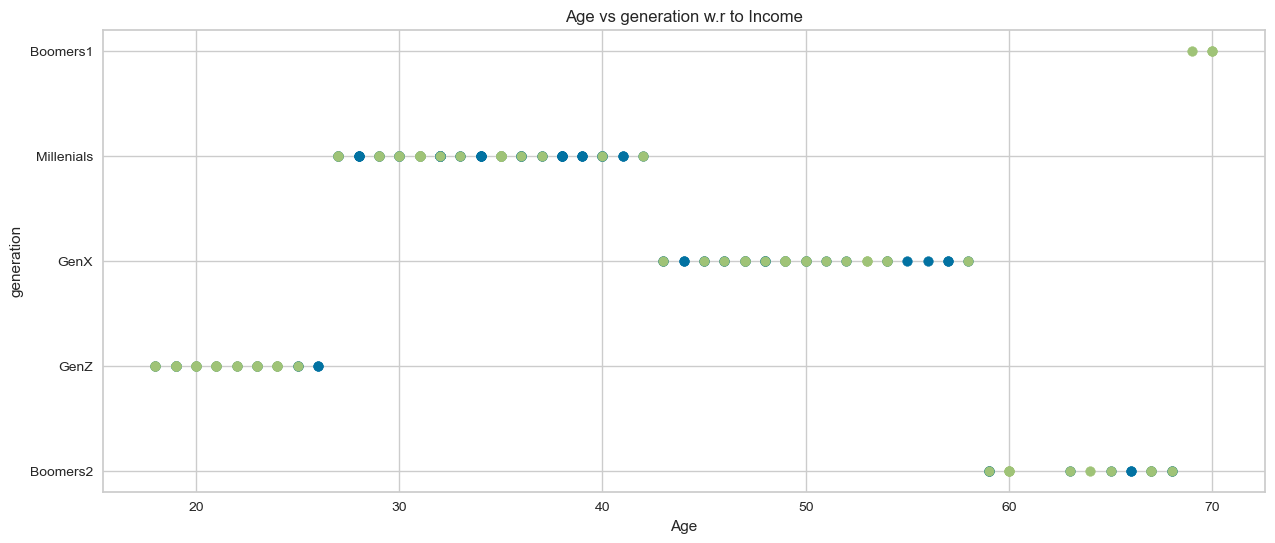

In [31]:
get_multi_income('Age','generation')

### Modelling/Clustering

We will use our initial dataset that is our df

In [32]:
##loading our dataset
df.head()

,CustomerID,Gender,Age,Annualincome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
# dropping the customer id column
# f.drop(['CustomerID'], axis=1,inplace=True)

In [34]:
df.head()

,CustomerID,Gender,Age,Annualincome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
# scaling our dataset using a standard scaler

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_features=scaler.fit_transform(df[['Annualincome','SpendingScore']])
scaled_features

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Elbow Method to get the number of clusters

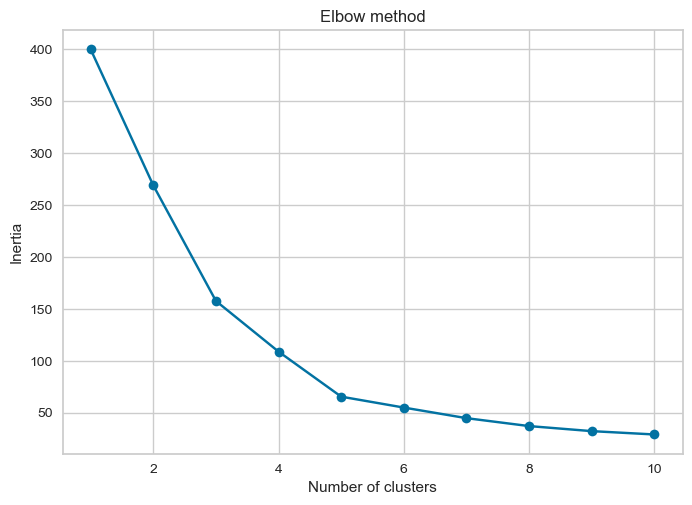

In [36]:
# obtaining the optimum number of  clusters
inertias=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

We got an optimum number of 6 clusters

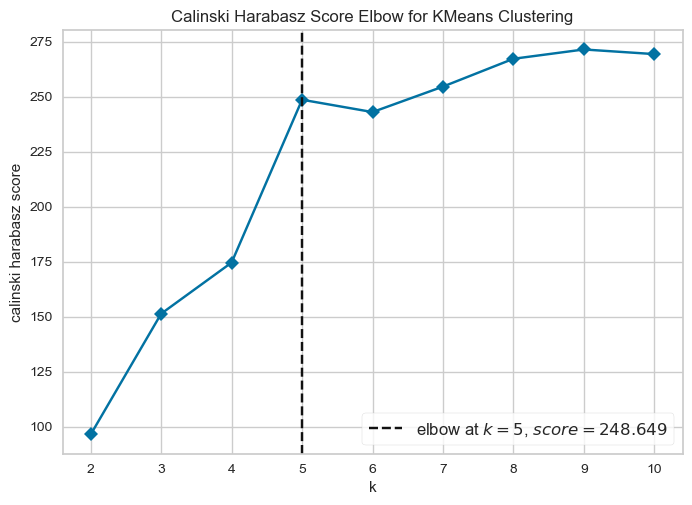

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [37]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz', timings=False
)

visualizer.fit(scaled_features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Silhoutte Method to get the number of clusters

In [38]:
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_features)
    label=kmeans.labels_
    Avs=silhouette_score(scaled_features,label,metric='euclidean')
    print(f"for number of clusters in {i} ,the maximum coeffecient is {Avs}")

for number of clusters in 2 ,the maximum coeffecient is 0.29512063001659344
for number of clusters in 3 ,the maximum coeffecient is 0.46658474419000145
for number of clusters in 4 ,the maximum coeffecient is 0.4939069237513199
for number of clusters in 5 ,the maximum coeffecient is 0.5546571631111091
for number of clusters in 6 ,the maximum coeffecient is 0.5394911417553498
for number of clusters in 7 ,the maximum coeffecient is 0.5263454490712252
for number of clusters in 8 ,the maximum coeffecient is 0.4541279523637649
for number of clusters in 9 ,the maximum coeffecient is 0.4570853966942764
for number of clusters in 10 ,the maximum coeffecient is 0.44942277625588267


### Fitting the Kmeans using the optimal clusters

In [39]:
#Instantiating our model
kmeans=KMeans(n_clusters=5)

# return a label for each data point based on their cluster
klabels=kmeans.fit_predict(scaled_features)
print(klabels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


#### Visualizing all the clusters

In [73]:
plt.figure(figsize=(8, 8))
plt.scatter(scaled_features[klabels==0, 0], scaled_features[klabels==0, 1], s=50, color='green', label=)
plt.scatter(scaled_features[klabels==1, 0], scaled_features[klabels==1, 1], s=50, color='yellow', label=)
plt.scatter(scaled_features[klabels==2, 0], scaled_features[klabels==2, 1], s=50, color='blue', label='Cluster 3')
plt.scatter(scaled_features[klabels==3, 0], scaled_features[klabels==3, 1], s=50, color='red', label='Cluster 4')
plt.scatter(scaled_features[klabels==4, 0], scaled_features[klabels==4, 1], s=50, color='violet', label='Cluster 5')

# Visualizing the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


SyntaxError: invalid syntax (1536252260.py, line 2)

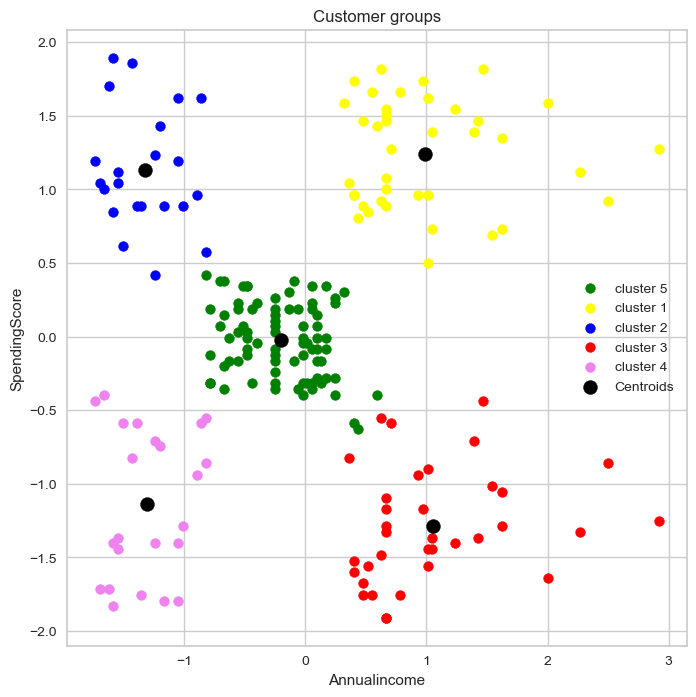

In [76]:
# visualizing all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(scaled_features[klabels==0,0],scaled_features[klabels==0,1],s=50,color='green',label='cluster 5')
plt.scatter(scaled_features[klabels==1,0],scaled_features[klabels==1,1],s=50,color='yellow',label='cluster 1')
plt.scatter(scaled_features[klabels==2,0],scaled_features[klabels==2,1],s=50,color='blue',label='cluster 2')
plt.scatter(scaled_features[klabels==3,0],scaled_features[klabels==3,1],s=50,color='red',label='cluster 3')
plt.scatter(scaled_features[klabels==4,0],scaled_features[klabels==4,1],s=50,color='violet',label='cluster 4')

#visualizing the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title('Customer groups')
plt.xlabel('Annualincome')
plt.ylabel('SpendingScore')
plt.legend()
plt.show()



In [41]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df[['Annualincome','SpendingScore']]])
#inverse transform the data
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df[['Annualincome','SpendingScore']]])
cluster_centers

,Annualincome,SpendingScore
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


## Adding clusters to the new dataset


In [42]:
new_df = df.copy()
#Adding the cluster data with dataframe
cluster_df=pd.concat([df,pd.DataFrame({'Cluster':kmeans.labels_})],axis=1)
cluster_df


,CustomerID,Gender,Age,Annualincome,SpendingScore,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


## Saving the clustering model

In [43]:
import joblib
joblib.dump(kmeans,'kmeans.pkl')

['kmeans.pkl']

In [44]:
#Saving the clustered dataset
cluster_df.to_csv("Cluster_data.csv")

In [45]:
cluster_df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [46]:
cluster_df.head()

,CustomerID,Gender,Age,Annualincome,SpendingScore,Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [47]:
y=cluster_df[['Cluster']]
X=cluster_df.drop('Cluster',axis=1)

In [48]:
y.shape

(200, 1)

In [49]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
X_train

,CustomerID,Gender,Age,Annualincome,SpendingScore
169,170,1,32,87,63
97,98,0,27,60,50
31,32,0,21,30,73
12,13,0,58,20,15
35,36,0,21,33,81
...,...,...,...,...,...
106,107,0,66,63,50
14,15,1,37,20,13
92,93,1,48,60,49
179,180,1,35,93,90


In [51]:
def load_model(clf,classifier,xtrain,ytrain,xtest,ytest):
    "instaniating the model"
    clf=classifier()

    "fitting the model"
    clf.fit(xtrain,ytrain)

    "doing the prediction "
    ypred=clf.predict(xtest)
    print('predictions____')
    print(ypred)
    print('---------------')

    "calculating the accuracy score"
    # clf_f1=f1_score(ytest,ypred)
    # print(f'The f1 score is {clf_f1}')

    "Computing the classification metrics"
    print('----------------')
    print('Classification Metrics')
    print(classification_report(ytest,ypred))

    print('------------------')
    
    plt.show()
    "calculating the accuracy score"
    clf_f1=f1_score(ytest,ypred,average='micro')
    print(f'The f1 score is {clf_f1}')
    
    

    return clf_f1

In [52]:
br_clf =  RandomForestClassifier(max_depth=2, random_state=0)

br_clf.fit(X_train,y_train)

"doing the prediction "
y_pred=br_clf.predict(X_test)
print('---------------')
"calculating the accuracy score"
# clf_f1=f1_score(ytest,ypred)
# print(f'The f1 score is {clf_f1}')


"Computing the classification metrics"
print('----------------')
print('Classification Metrics')
print(classification_report(y_test,y_pred))

print('------------------')
    
plt.show()

---------------
----------------
Classification Metrics
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       0.87      1.00      0.93        13
           4       1.00      1.00      1.00         5

    accuracy                           0.97        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.97      0.97      0.97        60

------------------


### Saving our model for future use


In [53]:
import pickle
filename='rf_model.sav'
pickle.dump(br_clf ,open(filename,'wb'))

In [54]:
loaded_model=pickle.load(open('rf_model.sav','rb'))
loaded_model.score(X_test,y_test)

0.9666666666666667

NameError: name 'l' is not defined